In [10]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [12]:
folder = 'Baza_zdjec_przerobiona/s'
folder_docelowy = '../../Dane/Baza_zdjec_zlaczone_1/'
slesh = '/'
png = '.png'

In [13]:
people = []
for i in range(1,41):
    images = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    people.append(images)

In [14]:
#Laczna ilosc zdjec
lacznie = 3600

ilosc = 40
rozmiar = 10
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab = np.zeros(lacznie, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(ilosc):
    #Petla przechodzi po zdjeciach
    m = 10
    
    for j in range(rozmiar):       
        m = m - 1
        
        for k in range(m):
            con = np.concatenate((people[i][j], people[i][9-k]), axis=1)
    
            #Zapisanie zmienionego zdjecia
            con = Image.fromarray(con)
            con.save(folder_docelowy+str(n)+png) 
      
            poloczone.append(con)
            tab[n] = 1
            n = n + 1
print(n)

1800


In [15]:
#Algorytm do wyszukiwania losowych zdjęć bez powtarzania

h = 40
w = 140
n = lacznie - (lacznie - (ilosc*45))

check = [0,0]
rand_list = np.zeros((h, w), dtype=np.uint8)

#Wylosowywanie zdjec
for i in range(lacznie - (ilosc*45)):
    
    images = []
    check = [41,0]
    #Losowanie 2 zdjec do polaczenia
    for j in range(2):   
    
        #Losowanie wspolrzednych x i y
        rand_x = random.randint(0,39)
        rand_y = random.randint(0,139)
    
        #Ponowne losowanie wspolrzednych x,y oraz sprawdzenie czy osoby nie są takie same
        while (rand_list[rand_x][rand_y] == 1) or (check[0] == rand_x) :
            rand_x = random.randint(0,39)
            rand_y = random.randint(0,139)

        check[j] = rand_x
        #Zapisanie wybranej kombinacji
        rand_list[rand_x][rand_y] = 1
        images.append(people[rand_x][rand_y])
        
    #Laczenie zdjec    
    con = np.concatenate((images[0], images[1]), axis=1)
    
    #Zapisanie zdjecia
    con = Image.fromarray(con)
    con.save(folder_docelowy+str(n)+png) 
    
    #Dodanie polaczonego zdjecia do tablicy
    poloczone.append(con)

    #Wartosc wykorzystywana do nauki sieci
    tab[n] = 0
    n = n + 1    

In [16]:
#Zapis tablicy do pliku CSV
tab.tofile(folder_docelowy+'nowe.csv', sep = ' ')   

In [17]:
print(rand_list[39])

[1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1]


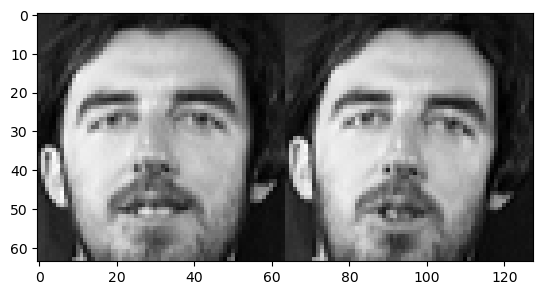

In [9]:
plt.imshow(poloczone[450], cmap = 'gray')

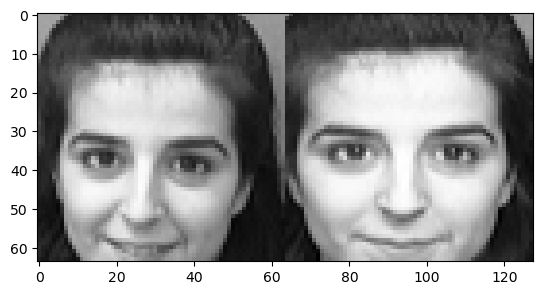

In [13]:
plt.imshow(poloczone[410], cmap = 'gray')

In [11]:
print(people[9][0])

[[135 134 135 ... 127 126 126]
 [135 135 135 ... 127 126 126]
 [135 135 136 ... 126 126 126]
 ...
 [ 39  29  22 ...  24  21  17]
 [ 38  29  20 ...  23  21  19]
 [ 30  23  24 ...  22  22  17]]


In [10]:
con_4 = np.concatenate((people[[9][0]], people[9][0]), axis=1)
plt.imshow(con_4, cmap = 'gray')

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [12]:


#Czytanie z pliku CSV i zapis do tablicy

with open('../../Dane/Baza_zdjec_1/nowe.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value = []
for i in new[0]:
    value.append(int(i))    
    
print(len(value))
print(value[1799])


2000
1
